In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2acc72e0-d3e3-4d29-810b-3ab9a78e0267',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-06-14T08:55:52.075Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9993}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9530, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
type(data)

dict

In [3]:
import pandas as pd


# This set_options is used to display all the data even that ...... one
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
pd.json_normalize(data['data'])


# HAve to include timestamp in this dataset
df = pd.json_normalize(data['data'])
df['Timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,9530,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906710e+07,1.906710e+07,NaN,1,NaN,NaN,2022-06-14T08:55:00.000Z,22641.112212,7.135437e+10,37.1878,-1.147133,-7.305688,-23.602045,-23.522893,-43.592513,-43.737856,4.317004e+11,45.0354,4.754634e+11,2022-06-14T08:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-14 08:56:07.811438
1,1027,Ethereum,ETH,ethereum,5747,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211665e+08,1.211665e+08,NaN,2,NaN,NaN,2022-06-14T08:55:00.000Z,1220.480372,4.452455e+10,34.5457,-1.750220,-1.321398,-31.029210,-39.698860,-59.631971,-54.371738,1.478813e+11,15.4271,1.478813e+11,2022-06-14T08:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-14 08:56:07.811438
2,825,Tether,USDT,tether,34663,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.159913e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-14T08:55:00.000Z,0.998702,1.099428e+11,29.5707,0.006709,0.017785,-0.069144,-0.003829,-0.155251,-0.156193,7.150616e+10,7.4596,7.960712e+10,2022-06-14T08:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-14 08:56:07.811438
3,3408,USD Coin,USDC,usd-coin,4404,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.417862e+10,5.417862e+10,NaN,4,NaN,NaN,2022-06-14T08:54:00.000Z,1.000175,1.327346e+10,43.6211,-0.030432,0.005740,-0.006059,0.013428,0.036022,0.014946,5.418809e+10,5.6521,5.418809e+10,2022-06-14T08:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-14 08:56:07.811438
4,1839,BNB,BNB,bnb,949,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-14T08:54:00.000Z,227.448606,2.564904e+09,46.7961,-1.266257,0.505300,-20.082113,-21.922496,-45.305281,-39.610569,3.713712e+10,3.8742,3.755558e+10,2022-06-14T08:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-14 08:56:07.811438
5,4687,Binance USD,BUSD,binance-usd,3838,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.742775e+10,1.742775e+10,NaN,6,NaN,NaN,2022-06-14T08:55:00.000Z,1.001291,1.067393e+10,21.6298,0.059052,0.057022,-0.049674,0.122508,0.202250,0.217718,1.745025e+10,1.8204,1.745025e+10,2022-06-14T08:55:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-14 08:56:07.811438
6,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,7,NaN,NaN,2022-06-14T08:54:00.000Z,0.507202,2.638718e+09,43.5551,-1.574082,13.288299,-14.081853,-5.115884,-46.553188,-37.444341,1.721142e+10,1.7955,2.282409e+10,2022-06-14T08:54:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-14 08:56:07.811438
7,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,8,NaN,NaN,2022-06-14T08:55:00.000Z,0.317943,2.620438e+09,43.5816,-0.729023,1.942455,-18.995796,-24.041157,-58.865345,-58.743792,1.537034e+10,1.6035,3.179428e+10,2022-06-14T08:55:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-14 08:56:07.811438
8,5426,Solana,SOL,solana,329,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.422086e+08,5.116169e+08,NaN,9,NaN,NaN,2022-0

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '2acc72e0-d3e3-4d29-810b-3ab9a78e0267',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
#       print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df
    
#     This will create a csv file of an API if not created and if created it will append to that file
    if not os.path.isfile(r'C:\Users\Shehzan Shaikh\Desktop\Alex The Analyst\API.csv'):
        df.to_csv(r'C:\Users\Shehzan Shaikh\Desktop\Alex The Analyst\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\Shehzan Shaikh\Desktop\Alex The Analyst\API.csv',mode='a',header= False)
        

In [6]:
# How to run an API

import os
from time import time
from time import sleep

# Its gonna run 333 time then print successfully and then go to sleep(wait) for 60 secs and then run again 
for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60) #Sleep for a minute and than run again
exit()

API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [7]:
df23= pd.read_csv(r'C:\Users\Shehzan Shaikh\Desktop\Alex The Analyst\API.csv')

In [8]:
df23

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,9529,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.906618e+07,1.906618e+07,NaN,1,NaN,NaN,2022-06-13T10:41:00.000Z,24200.214556,5.832280e+10,67.7231,0.563901,-12.126442,-22.948485,-17.665548,-41.116182,-37.360945,4.614057e+11,46.8933,5.082045e+11,2022-06-13T10:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-13 10:41:40.900485
1,1,1027,Ethereum,ETH,ethereum,5747,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.211553e+08,1.211553e+08,NaN,2,NaN,NaN,2022-06-13T10:40:00.000Z,1244.645408,3.801136e+10,52.0745,1.803252,-15.469496,-34.740105,-38.542631,-59.741799,-50.876274,1.507954e+11,15.3430,1.507954e+11,2022-06-13T10:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-13 10:41:40.900485
2,2,825,Tether,USDT,tether,34624,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.229398e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-13T10:40:00.000Z,0.998367,9.545644e+10,57.1878,-0.015074,-0.062365,-0.105108,0.009365,-0.184612,-0.186933,7.217593e+10,7.3437,7.958046e+10,2022-06-13T10:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-13 10:41:40.900485
3,3,3408,USD Coin,USDC,usd-coin,4392,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.408215e+10,5.408215e+10,NaN,4,NaN,NaN,2022-06-13T10:40:00.000Z,1.000613,1.085259e+10,80.4788,0.033537,0.029215,0.046739,0.031931,0.089767,0.044156,5.411531e+10,5.5054,5.411531e+10,2022-06-13T10:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-13 10:41:40.900485
4,4,1839,BNB,BNB,bnb,947,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-13T10:40:00.000Z,227.985879,1.995837e+09,32.1894,2.194601,-11.916302,-26.489157,-19.770598,-45.653542,-37.613034,3.722484e+10,3.7875,3.764429e+10,2022-06-13T10:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-13 10:41:40.900485
5,5,4687,Binance USD,BUSD,binance-usd,3835,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.774254e+10,1.774254e+10,NaN,6,NaN,NaN,2022-06-13T10:41:00.000Z,1.001523,1.008706e+10,81.3132,0.143110,0.001183,-0.012524,-0.158967,0.130658,0.221845,1.776956e+10,1.8078,1.776956e+10,2022-06-13T10:41:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-13 10:41:40.900485
6,6,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",4.500000e+10,3.373903e+10,3.451285e+10,NaN,7,NaN,NaN,2022-06-13T10:40:00.000Z,0.459101,2.048162e+09,35.2596,3.261872,-11.835643,-27.917596,-11.701964,-52.226952,-41.906728,1.548963e+10,1.5760,2.065955e+10,2022-06-13T10:40:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-13 10:41:40.900485
7,7,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,8,NaN,NaN,2022-06-13T10:41:00.000Z,0.315824,2.086339e+09,41.8260,1.891506,-9.463040,-22.377249,-25.324651,-56.553030,-58.020522,1.526789e+10,1.5517,3.158236e+10,2022-06-13T10:41:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-13 10:41:40.900485
8,8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,3.422089e+08,5.

In [9]:
# Now transforming Data

pd.set_option('display.float_format', lambda x:'%.5f' %x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,9530,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19067100.00000,19067100.00000,NaN,1,NaN,NaN,2022-06-14T09:02:00.000Z,22635.36332,70794908358.47156,35.35380,-1.02489,-6.52163,-23.64997,-23.51860,-43.64967,-43.81751,431590736048.26123,45.15220,475342629818.56000,2022-06-14T09:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-14 09:02:51.693384
1,1027,Ethereum,ETH,ethereum,5747,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121166512.18650,121166512.18650,NaN,2,NaN,NaN,2022-06-14T09:01:00.000Z,1220.73543,44156179595.49847,32.42430,-1.63444,0.17013,-31.02028,-39.62526,-59.64155,-54.37712,147912254236.09375,15.47430,147912254236.09000,2022-06-14T09:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-14 09:02:51.693384
2,825,Tether,USDT,tether,34663,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,71599130290.94582,79710622658.21005,NaN,3,NaN,NaN,2022-06-14T09:02:00.000Z,0.99881,109298498717.81299,27.87650,0.01340,0.04418,-0.05731,-0.00694,-0.13432,-0.14084,71513787084.30286,7.48160,79615610887.63000,2022-06-14T09:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-14 09:02:51.693384
3,3408,USD Coin,USDC,usd-coin,4404,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,54178615552.90106,54178615552.90106,NaN,4,NaN,NaN,2022-06-14T09:01:00.000Z,1.00024,13140760257.68254,40.59140,0.00021,0.02702,-0.02119,0.01532,0.02555,0.03632,54191451474.74626,5.66880,54191451474.75000,2022-06-14T09:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-14 09:02:51.693384
4,1839,BNB,BNB,bnb,949,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-14T09:01:00.000Z,226.66104,2547851173.54553,44.02660,-1.44479,1.97423,-20.36029,-22.18109,-45.52266,-39.90907,37008529139.16695,3.87180,37425536807.45000,2022-06-14T09:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-14 09:02:51.693384
5,4687,Binance USD,BUSD,binance-usd,3838,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17427753423.40926,17427753423.40926,NaN,6,NaN,NaN,2022-06-14T09:02:00.000Z,1.00111,10550397098.18706,17.52980,0.10684,-0.06391,0.06247,0.04721,0.20329,0.01766,17447172080.76393,1.82530,17447172080.76000,2022-06-14T09:02:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-06-14 09:02:51.693384
6,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,7,NaN,NaN,2022-06-14T09:01:00.000Z,0.50492,2623984739.93812,41.25850,-2.41329,13.78926,-14.53247,-5.14079,-46.80162,-37.74267,17133850840.31674,1.79250,22721229091.17000,2022-06-14T09:01:00.000Z,1839.00000,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-14 09:02:51.693384
7,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,8,NaN,NaN,2022-06-14T09:02:00.000Z,0.31756,2591786554.74315,40.75010,-0.72077,3.08410,-19.07346,-24.19171,-59.03683,-58.80987,15351967783.18922,1.60610,31756274221.28000,2022-06-14T09:02:00.000Z,1839.00000,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2

In [12]:
df4=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.02489,-6.52163,-23.64997,-23.51860,-43.64967,-43.81751
Ethereum,-1.63444,0.17013,-31.02028,-39.62526,-59.64155,-54.37712
Tether,0.01340,0.04418,-0.05731,-0.00694,-0.13432,-0.14084
USD Coin,0.00021,0.02702,-0.02119,0.01532,0.02555,0.03632
BNB,-1.44479,1.97423,-20.36029,-22.18109,-45.52266,-39.90907
Binance USD,0.10684,-0.06391,0.06247,0.04721,0.20329,0.01766
Cardano,-2.41329,13.78926,-14.53247,-5.14079,-46.80162,-37.74267
XRP,-0.72077,3.08410,-19.07346,-24.19171,-59.03683,-58.80987
Solana,-2.58665,14.55418,-23.37611,-40.87022,-70.14524,-63.84541


In [13]:
df5 = df4.stack()

df5

name                                         
Bitcoin          quote.USD.percent_change_1h     -1.02489
                 quote.USD.percent_change_24h    -6.52163
                 quote.USD.percent_change_7d    -23.64997
                 quote.USD.percent_change_30d   -23.51860
                 quote.USD.percent_change_60d   -43.64967
                 quote.USD.percent_change_90d   -43.81751
Ethereum         quote.USD.percent_change_1h     -1.63444
                 quote.USD.percent_change_24h     0.17013
                 quote.USD.percent_change_7d    -31.02028
                 quote.USD.percent_change_30d   -39.62526
                 quote.USD.percent_change_60d   -59.64155
                 quote.USD.percent_change_90d   -54.37712
Tether           quote.USD.percent_change_1h      0.01340
                 quote.USD.percent_change_24h     0.04418
                 quote.USD.percent_change_7d     -0.05731
                 quote.USD.percent_change_30d    -0.00694
                 quote.USD

In [18]:
# As we can see first the given data was in data frame format
type(df)

# Now it is in series format after the .stack properties
type(df5)

pandas.core.series.Series

In [21]:
# Now we want data back in dataFrame form

df6 = df5.to_frame(name='Values')

In [23]:
type(df6)

pandas.core.frame.DataFrame

In [24]:
df6

Values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -1.02489
                quote.USD.percent_change_24h  -6.52163
                quote.USD.percent_change_7d  -23.64997
                quote.USD.percent_change_30d -23.51860
                quote.USD.percent_change_60d -43.64967
                quote.USD.percent_change_90d -43.81751
Ethereum        quote.USD.percent_change_1h   -1.63444
                quote.USD.percent_change_24h   0.17013
                quote.USD.percent_change_7d  -31.02028
                quote.USD.percent_change_30d -39.62526
                quote.USD.percent_change_60d -59.64155
                quote.USD.percent_change_90d -54.37712
Tether          quote.USD.percent_change_1h    0.01340
                quote.USD.percent_change_24h   0.04418
                quote.USD.percent_change_7d   -0.05731
                quote.USD.percent_change_30d  -0.00694
                quote.USD.percent_change_60d  -0.13432
                quote.USD.percent_change_90d  -0.14084
USD Coin        quote.USD.percent_change_1h    0.00021
                quote.USD.percent_change_24h   0.02702
                quote.USD.percent_change_7d   -0.02119
                quote.USD.percent_change_30d   0.01532
                quote.USD.percent_change_60d   0.02555
                quote.USD.percent_change_90d   0.03632
BNB             quote.USD.percent_change_1h   -1.44479
                quote.USD.percent_change_24h   1.97423
                quote.USD.percent_change_7d  -20.36029
                quote.USD.percent_change_30d -22.18109
                quote.USD.percent_change_60d -45.52266
                quote.USD.percent_change_90d -39.90907
Binance USD     quote.USD.percent_change_1h    0.10684
                quote.USD.percent_change_24h  -0.06391
                quote.USD.percent_change_7d    0.06247
                quote.USD.percent_change_30d   0.04721
                quote.USD.percent_change_60d   0.20329
                quote.USD.percent_change_90d   0.01766
Cardano         quote.USD.percent_change_1h   -2.41329
                quote.USD.percent_change_24h  13.78926
                quote.USD.percent_change_7d  -14.53247
                quote.USD.percent_change_30d  -5.14079
                quote.USD.percent_change_60d -46.80162
                quote.USD.percent_change_90d -37.74267
XRP             quote.USD.percent_change_1h   -0.72077
                quote.USD.percent_change_24h   3.08410
                quote.USD.percent_change_7d  -19.07346
                quote.USD.percent_change_30d -24.19171
                quote.USD.percent_change_60d -59.03683
                quote.USD.percent_change_90d -58.80987
Solana          quote.USD.percent_change_1h   -2.58665
                quote.USD.percent_change_24h  14.55418
                quote.USD.percent_change_7d  -23.37611
                quote.USD.percent_change_30d -40.87022
                quote.USD.percent_change_60d -70.14524
                quote.USD.percent_change_90d -63.84541
Dogecoin        quote.USD.percent_change_1h   -1.42624
                quote.USD.percent_change_24h   5.15501
                quote.USD.percent_change_7d  -29.00337
                quote.USD.percent_change_30d -35.11100
                quote.USD.percent_change_60d -61.10558
                quote.USD.percent_change_90d -50.31809
Polkadot        quote.USD.percent_change_1h   -0.58589
                quote.USD.percent_change_24h  14.40401
                quote.USD.percent_change_7d  -18.24857
                quote.USD.percent_change_30d -31.80644
                quote.USD.percent_change_60d -58.73256
                quote.USD.percent_change_90d -59.36193
Dai             quote.USD.percent_change_1h   -0.02473
                quote.USD.percent_change_24h   0.06891
                quote.USD.percent_change_7d    0.02698
                quote.USD.percent_change_30d   0.05412
                quote.USD.percent_change_60d   0.07959
                quote.USD.percent

In [25]:
df6.count()

Values    90
dtype: int64

In [31]:
index = pd.Index(range(90))

df7 = df6.set_index(index)

In [32]:
df7

,Values
0,-1.02489
1,-6.52163
2,-23.64997
3,-23.51860
4,-43.64967
5,-43.81751
6,-1.63444
7,0.17013
8,-31.02028
9,-39.62526


In [35]:
# Now we have to reindex this index because then it will be in proper format that we want it in
index = pd.Index(range(90))

df7 = df6.reset_index()


In [37]:
# This is in the proper format that we wanted it in

df7

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-1.02489
1,Bitcoin,quote.USD.percent_change_24h,-6.52163
2,Bitcoin,quote.USD.percent_change_7d,-23.64997
3,Bitcoin,quote.USD.percent_change_30d,-23.51860
4,Bitcoin,quote.USD.percent_change_60d,-43.64967
5,Bitcoin,quote.USD.percent_change_90d,-43.81751
6,Ethereum,quote.USD.percent_change_1h,-1.63444
7,Ethereum,quote.USD.percent_change_24h,0.17013
8,Ethereum,quote.USD.percent_change_7d,-31.02028
9,Ethereum,quote.USD.percent_change_30d,-39.62526


In [44]:
df7.rename(columns={'level_1':'Percent_Change'})

df7.rename(columns={'name':'Name','level_1':'Percent_Change'},inplace=True)

In [48]:
df7

,Name,Percent_Change,Values
0,Bitcoin,quote.USD.percent_change_1h,-1.02489
1,Bitcoin,quote.USD.percent_change_24h,-6.52163
2,Bitcoin,quote.USD.percent_change_7d,-23.64997
3,Bitcoin,quote.USD.percent_change_30d,-23.51860
4,Bitcoin,quote.USD.percent_change_60d,-43.64967
5,Bitcoin,quote.USD.percent_change_90d,-43.81751
6,Ethereum,quote.USD.percent_change_1h,-1.63444
7,Ethereum,quote.USD.percent_change_24h,0.17013
8,Ethereum,quote.USD.percent_change_7d,-31.02028
9,Ethereum,quote.USD.percent_change_30d,-39.62526


In [53]:
df7['Percent_Change'].replace({'quote.USD.percent_change_1h':'1h','quote.USD.percent_change_24h':'24h','quote.USD.percent_change_7d':'7d','quote.USD.percent_change_30d':'30d','quote.USD.percent_change_60d':'60d','quote.USD.percent_change_90d':'90d'},inplace=True)

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

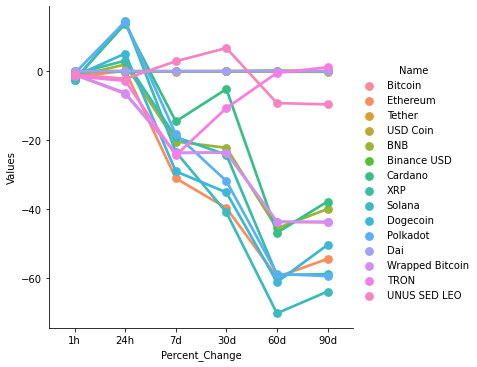

In [55]:
sns.catplot(x='Percent_Change',y='Values',hue='Name',data=df7,kind='point')